# PROJECT ICE VIDEO GAMES STORE 

# Introduccion 
ICE es una tienda en línea especializada en la venta de videojuegos a nivel global. Además de ofrecer una amplia variedad de títulos, la plataforma se encarga de gestionar reseñas de usuarios y expertos, clasificar los juegos por géneros y plataformas (como Xbox o PlayStation), y recopilar datos históricos sobre ventas. Este proyecto tiene como objetivo analizar esta información para identificar patrones y factores clave que determinen el éxito o fracaso de un videojuego.

Mediante este análisis, se buscará desarrollar un modelo que permita predecir qué juegos tienen mayor potencial de éxito en el mercado. Esto no solo facilitará la detección de proyectos prometedores, sino que también servirá como base para planificar campañas publicitarias más efectivas y estratégicas, optimizando así los recursos y maximizando el impacto en el mercado global de videojuegos.

# Carga de los datos 

Para nuestro analisis contamos con un dataset relacionado, proporcionado por la compañia denominado `games.csv` en donde contraremos la informacion y a su vez se procedera con el desglose y analisis del mismo.

Para esta primera parte del proyecto al leer los archivos CSV se debe tener en cuenta los sepadarores, en este caso en particular tenemos como separador `,` de tal razon que se procedera a corregir este parametro y poder importar los datos y su informacion de manera correcta.

In [1]:
# Cargar todas las librerías
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# leer conjuntos de datos:
games=pd.read_csv('/Users/ASUS/Documents/Tripleten/Proyecto spring 6/games.csv', sep=',')


# Descripcion de los datos 

El data set proporcionado por la compañia lo podemos desglosar por columnaas de la siguiente manera:

`— Name (Nombre del Video Juego)`

`— Platform (Plataforma)`

`— Year_of_Release (Año de lanzamiento)`

`— Genre (Género) `

`— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)` 

`— EU_sales (ventas en Europa en millones de dólares estadounidenses) `

`— JP_sales (ventas en Japón en millones de dólares estadounidenses) `

`— Other_sales (ventas en otros países en millones de dólares estadounidenses) `

`— Critic_Score (máximo de 100)` 

`— User_Score (máximo de 10)` 

`— Rating (ESRB)`

In [3]:
# Mostramos informacion preliminar del Dataframe:

games.info()

sample_games= games.sample(n=5)

print(sample_games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                                 Name Platform  Year_of_Release   Genre  \
14059                    Saints Row 2       PC           2009.0  Action   
16230                   Madden NFL 13      PS3           2012.0  Sports   
11222           

# Preparacion de datos 

De manera inicial, se ha observado que en cada columna del conjunto de datos existe una cantidad significativa de valores nulos o vacíos, lo cual podría afectar la calidad y confiabilidad del análisis. Además, se identificaron inconsistencias en los tipos de datos, donde algunos valores no coinciden con la naturaleza esperada de las columnas correspondientes.

Como primer paso, se procederá a abordar el problema de los datos nulos, implementando estrategias como la imputación o eliminación, según sea más adecuado para cada caso. Posteriormente, se trabajará en la normalización y corrección de los tipos de datos, asegurando que cada columna contenga información coherente y estructurada para facilitar el análisis posterior. Estas acciones son fundamentales para garantizar la integridad y utilidad de los datos en las siguientes fases del proyecto.



In [4]:
# Ajustamos los nombres de las columnas para mantener minuculas:

games.columns=[columns.lower()for columns in games.columns]

# Ajustamos nombres de todo el dataframe en minusculas:
games=games.apply(lambda x:x.str.lower() if x.dtype=='object' else x)
print(games.columns) 

# Comprobacion de duplicados:
num_duplicates=games.duplicated().sum()

print()
print(f"Numero de duplicados: {num_duplicates}")



Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Numero de duplicados: 0


In [5]:
# Analisis exploratorio de datos NA:

games_na_nu=games.isna().sum()

print(games_na_nu)

games_year=games['year_of_release'].unique()

print(games_year)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


Al explorar los datos nos damos cuenta que algunos tipos de daltos no corresponden al valor que deben represetnar especificamente el de las columnas `year_of_release` y `user_score` de tal manera se procede a su tratamiento obenienndo de misma manera una organizacion de los mismos.

In [6]:
#Ajustar tipo de datos:

games['year_of_release']=pd.to_numeric(games['year_of_release'], errors='coerce')

games['year_of_release']=games['year_of_release'].astype('Int64')

games['user_score']=pd.to_numeric(games['user_score'], errors='coerce')

games['user_score']=games['user_score'].astype('float')
games.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


# Procesamiento preliminar de datos nulos:

Para esta parte de nuestra preapracion de datos decidimos reemplazar en la columna `year_of_release` partiendo de la premisa de que solo para el año 2016 habria datos faltantes decidimos completarlos con este mismo, para la columna `rating` por las siglas 'TBD' que significa "to be determined" (a determinar) y para los demas valores de manera preliminar se mantendra en blanco con fin de adelantar investigacion posterior

In [7]:
# Reemplazamos Datos:
games['year_of_release']=games['year_of_release'].fillna(value=2016)

games['rating']=games['rating'].fillna(value='tbd')


games['critic_score']=games['critic_score'].fillna('')
games['user_score']=games['user_score'].fillna('')

games_na_nu=games.isna().sum()
print(games_na_nu)

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Al cabo de realizar el procesamiento de datos nulos, se puede evidenciar que existen dos nombres de video juegos ausentes, por consiguiente se hace notorio el hecho de que la mejor manera para tratarlo es eliminar del dataframe, por la natureleza de los datos se hace imposible trabajar con esas columnas. 

In [8]:
#Eliminacion de filas con NAN:

games=games.dropna()
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  object 
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(4), object(6)
memory usage: 1.5+ MB


## Análisis Preliminar del Dataset `games.csv`

Tras completar el procesamiento inicial de los datos contenidos en el archivo `games.csv`, se ha preparado el conjunto de datos para su análisis exhaustivo. Este proceso incluyó la limpieza, transformación y organización de la información, con el objetivo de garantizar su calidad y consistencia.

Con los datos estructurados y listos para su uso, se procederá a realizar un análisis detallado que permita identificar patrones, tendencias y relaciones clave. Este análisis será fundamental para proponer las mejores alternativas y soluciones a la problemática planteada por la empresa, contribuyendo así a la toma de decisiones informadas y estratégicas

## Análisis de Datos

A lo largo de este analisis se ira respondiendo una seria de preguntas y existira explicaciones para cada puntos que se desarrollara en cada uno de las siguientes fases.

#### ¿Cuántos juegos fueron lanzados en diferentes años?. ¿Son significativos los datos de cada período?

    year_of_release  name
0              1980     9
1              1981    46
2              1982    36
3              1983    17
4              1984    14
5              1985    14
6              1986    21
7              1987    16
8              1988    15
9              1989    17
10             1990    16
11             1991    41
12             1992    43
13             1993    60
14             1994   121
15             1995   219
16             1996   263
17             1997   289
18             1998   379
19             1999   338
20             2000   350
21             2001   482
22             2002   829
23             2003   775
24             2004   762
25             2005   939
26             2006  1006
27             2007  1197
28             2008  1427
29             2009  1426
30             2010  1255
31             2011  1136
32             2012   653
33             2013   544
34             2014   581
35             2015   606
36             2016   771


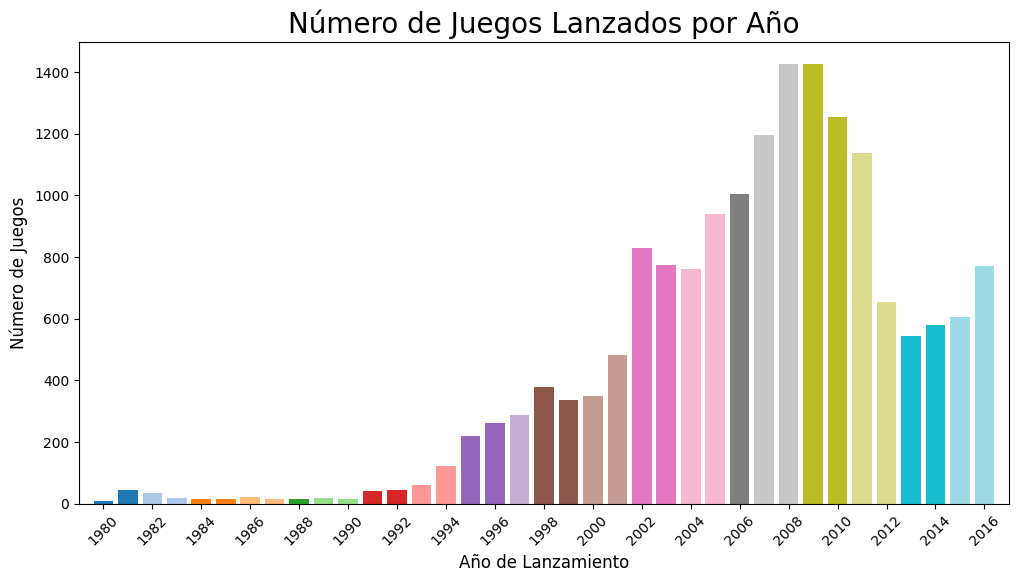

In [9]:

games_for_year=games.groupby('year_of_release')['name'].count().reset_index()
print(games_for_year)

colors = plt.get_cmap('tab20', len(games_for_year['year_of_release']))
plt.figure(figsize=(12,6))
plt.bar(games_for_year['year_of_release'],games_for_year['name'], color=colors(range(len(games_for_year['year_of_release']))))
plt.title('Número de Juegos Lanzados por Año', fontsize=20)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Número de Juegos', fontsize=12)
plt.xlim(1979,2017)
plt.xticks(np.arange(1980, 2017, 2),rotation=45)  

plt.show()

¿Son significativos los datos de cada período?

El análisis de los datos sobre el número de lanzamientos por año permite identificar patrones con cierta relevancia.

Década de 1980: El número de juegos lanzados anualmente era muy bajo, con un pico máximo que no superaba los 50 títulos. Esto puede atribuirse a las limitaciones tecnológicas de la época, así como a una menor competencia y demanda en la industria.
Década de 1990: Se observa un aumento considerable en la cantidad de lanzamientos, impulsado por avances tecnológicos y el crecimiento del mercado de los videojuegos.
Inicio del siglo XXI: La industria experimenta un crecimiento exponencial en la cantidad de lanzamientos, lo que sugiere un auge en la popularidad y adopción de los videojuegos como parte de la cultura global.
A partir de 2010: Se identifica una recesión en la cantidad de lanzamientos, seguida de un ligero repunte en los años más recientes. Esto podría indicar una fase de transformación en la industria, posiblemente influenciada por cambios en el modelo de negocio, nuevas plataformas de distribución y evolución en las preferencias de los consumidores.

## Análisis Segun Plataforma

Observaremos cómo varían las ventas de una plataforma a otra. Se elegiran las plataformas con las mayores ventas totales y construira una distribución basada en los datos de cada año. 

In [10]:
# Plataformas de analisis:

games_platform=games['platform'].unique()

print(games_platform)


['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']


In [11]:
# Calcular las ventas totales de cada plataforma:

games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  object 
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(5), object(6)
memory usage: 1.7+ MB


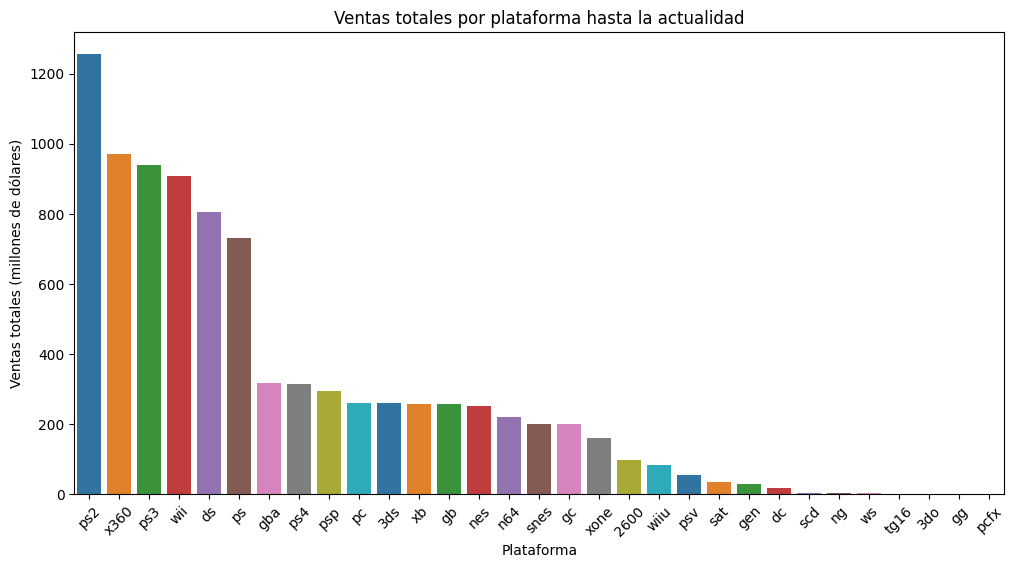

In [12]:
# Ventas totales por plataforma en millones de dolares:

# Agrupar por plataforma y sumar las ventas
games_platform_sale = games.groupby('platform')['total_sales'].sum().reset_index()

# Ordenar por ventas totales
games_platform_sales = games_platform_sale.sort_values(by='total_sales', ascending=False)

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='total_sales',hue='platform', data=games_platform_sales, palette='tab10')

plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones de dólares)')
plt.title('Ventas totales por plataforma hasta la actualidad')
plt.xticks(rotation=45) 
plt.show()


In [13]:
# Filtrar por el mayor numero de ventas la plataformas que se consideran relevantes:

platform_filter=['ps2','ps3','wii','x360','pc'] #'xb','gba','gc','3ds','psv','ps4','n64','xone','snes','sat','wiiu'

games_filtered=games[games['platform'].isin(platform_filter)]

games_platform_year=games_filtered.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

print(games_platform_year)


   platform  year_of_release  total_sales
0        pc             1985         0.04
1        pc             1988         0.03
2        pc             1992         3.03
3        pc             1994        12.87
4        pc             1995         4.22
5        pc             1996        10.58
6        pc             1997        11.27
7        pc             1998         3.26
8        pc             1999         4.74
9        pc             2000         4.66
10       pc             2001         5.47
11       pc             2002         8.57
12       pc             2003         8.84
13       pc             2004        10.39
14       pc             2005         4.37
15       pc             2006         2.85
16       pc             2007         9.28
17       pc             2008        12.42
18       pc             2009        16.91
19       pc             2010        24.28
20       pc             2011        35.03
21       pc             2012        23.22
22       pc             2013      

Se identifica que las plataformas con mayor numero de ventas totales y a su vez considerados como los mas importantes  a lo largo de tres decadas, donde destacamos nuestra eleccion con el ``Play station 2`` seguido por su competencia en segundo lugar con el `` Xbox 360``, en tercer lugar se encuentra el sucesor de sony `Play Station 3`, en cuarto lugar se encuentra la consola de nintendo `WII` y por ultimo , teniendo gran relevancia mundial emcontramos al `Pc` 

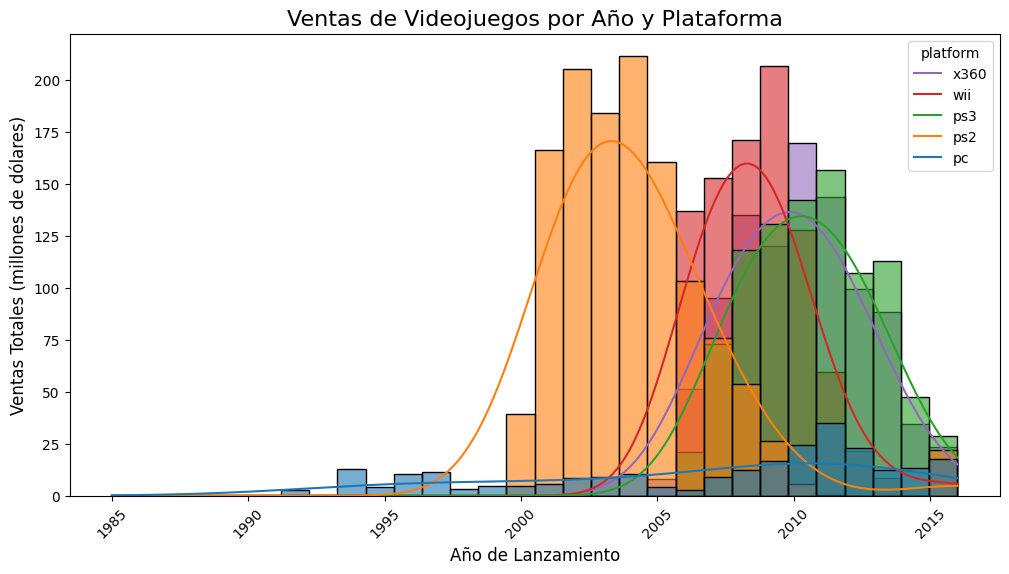

In [14]:

plt.figure(figsize=(12,6))

sns.histplot(data=games_platform_year, x='year_of_release', weights= 'total_sales', hue= 'platform', bins= 30, kde=True,palette='tab10',alpha=0.6)

plt.title('Ventas de Videojuegos por Año y Plataforma', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (millones de dólares)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='platform', labels=['x360','wii','ps3','ps2','pc'])

plt.show()

In [15]:

games_platform_sale = games.groupby('platform')['total_sales'].sum()

top_platforms = games_platform_sale.sort_values(ascending=False).head(20).index.tolist()


#  Identificar plataformas populares que ya no tienen ventas

ultimo_anio = 2016  # Último año con datos
ventas_recientes = games[games['year_of_release'] == ultimo_anio]['platform'].unique()

plataformas_extintas = [p for p in top_platforms if p not in ventas_recientes]
print("Plataformas que solían ser populares pero ya no tienen ventas:", plataformas_extintas)



games_filtered=games[games['platform'].isin(platform_filter)]
# Análisis del tiempo de vida de las plataformas
vida_util = games.groupby('platform')['year_of_release'].agg(['min', 'max'])
vida_util['duracion'] = vida_util['max'] - vida_util['min']

print("\nTiempo de vida de cada plataforma:")
print(vida_util.sort_values(by='duracion',ascending=False))

mean_vida_util= vida_util['duracion'].median() 
print()
print( f"Duracion promedio vida util {mean_vida_util} años")


Plataformas que solían ser populares pero ya no tienen ventas: ['nes', 'snes']

Tiempo de vida de cada plataforma:
           min   max  duracion
platform                      
2600      1980  2016        36
ds        1985  2016        31
pc        1985  2016        31
gb        1988  2016        28
ps        1994  2016        22
n64       1996  2016        20
gba       2000  2016        16
ps2       2000  2016        16
xb        2000  2016        16
gc        2001  2016        15
psp       2004  2016        12
nes       1983  1994        11
x360      2005  2016        11
wii       2006  2016        10
dc        1998  2008        10
ps3       2006  2016        10
snes      1990  1999         9
psv       2011  2016         5
sat       1994  1999         5
3ds       2011  2016         5
gen       1990  1994         4
wiiu      2012  2016         4
ng        1993  1996         3
xone      2013  2016         3
ps4       2013  2016         3
ws        1999  2001         2
3do       1994  1

### Conclusiones 
De esta primera estapa de analisis explotario de datos se pueden deducir que tenemos tendencias y patrones relevantes a su vez el promedio de vida util de una plataforma y tambien la evidencia de que aproximadamente cada 6 años o menos se lanza una nueva plataforma teniendo en cuenta los datos de la plataforma. Es importante aclarar que se considera como una matriz de datos lo suficientemente importante apartir del 2010 en adelante, donde se pueden observar tendencian en cada plataforma y a su vez en cada generacion de las mismas que surge con el tiempo. 

# ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?

Centraremos nuestro analisis a partir del 2010 con el fin de identificar las tendencias relevantes que nos permitan responder las diferentes incognitas de este estudio de caso

In [16]:
# Nuevo dataframe con los datos de interes

games=games[games['year_of_release']>= 2010]

games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5546 entries, 14 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5546 non-null   object 
 1   platform         5546 non-null   object 
 2   year_of_release  5546 non-null   Int64  
 3   genre            5546 non-null   object 
 4   na_sales         5546 non-null   float64
 5   eu_sales         5546 non-null   float64
 6   jp_sales         5546 non-null   float64
 7   other_sales      5546 non-null   float64
 8   critic_score     5546 non-null   object 
 9   user_score       5546 non-null   object 
 10  rating           5546 non-null   object 
 11  total_sales      5546 non-null   float64
dtypes: Int64(1), float64(5), object(6)
memory usage: 568.7+ KB


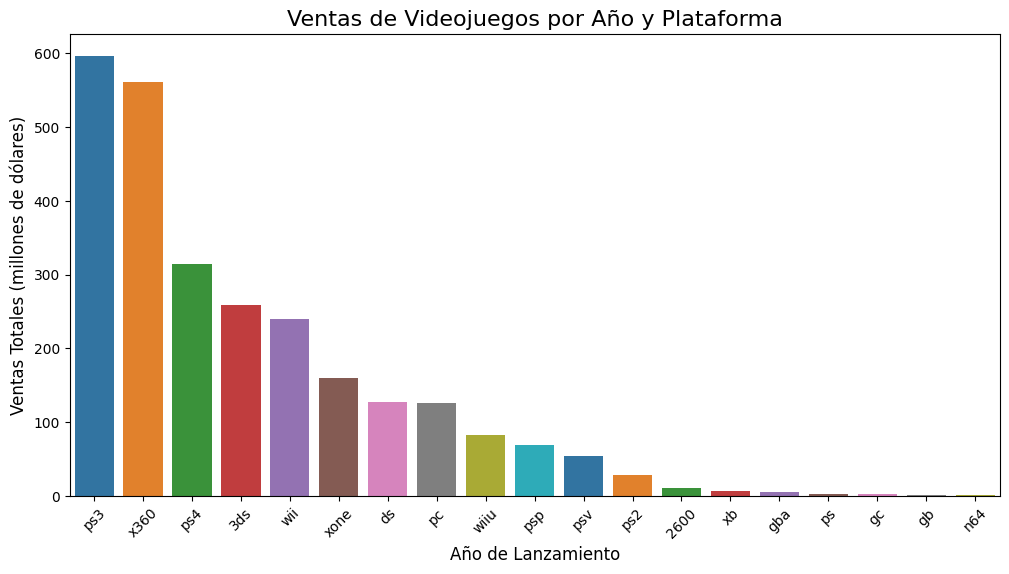

In [17]:
# Plataformas lideres


games_leader=games.groupby('platform')['total_sales'].sum().reset_index()
games_leader_platform = games_leader.sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(12,6))

sns.barplot(data=games_leader_platform, x='platform',y= 'total_sales', hue= 'platform',palette='tab10')

plt.title('Ventas de Videojuegos por Año y Plataforma', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (millones de dólares)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

### Lideres en ventas :

Tras analizar la clasificación de las plataformas líderes en el mercado, se identifica a Sony como la empresa dominante, destacando especialmente la PS3 como la consola con mayor participación. Además, su consola de nueva generación también se posiciona entre las más vendidas.

En segundo lugar, Microsoft mantiene una fuerte presencia con la Xbox 360, que representa una parte significativa del mercado, seguida por la Xbox One, su consola de nueva generación.

Por su parte, Nintendo también se encuentra entre los líderes con sus plataformas 3DS, Wii y Wii U, consolidando su posición en la industria.
En conjunto, estas tres empresas dominan el sector con seis plataformas, reflejando su influencia en el mercado de los videojuegos.

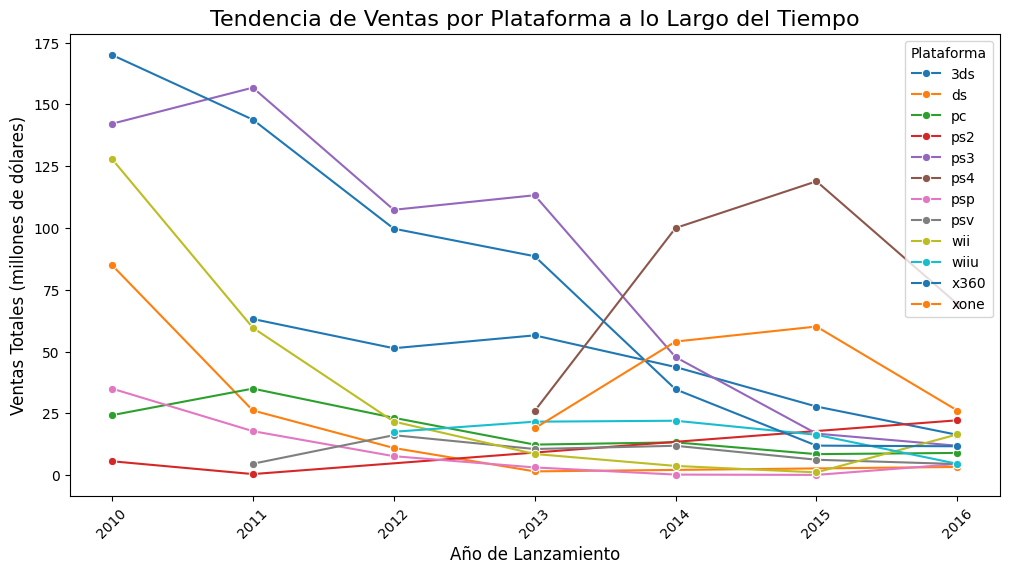

In [18]:



# 3. Calcular ventas por plataforma y año (TENDENCIA DE CRECIMIENTO / DECLIVE)
games_platform_year = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#  4. Filtrar las plataformas más vendidas (TOP 5 para mejor visualización)
top_platforms = games_leader_platform['platform'].head(12).tolist()
games_top_platforms = games_platform_year[games_platform_year['platform'].isin(top_platforms)]

#  5. Graficar tendencia de ventas por plataforma a lo largo del tiempo
plt.figure(figsize=(12,6))
sns.lineplot(data=games_top_platforms, x='year_of_release', y='total_sales', hue='platform', palette='tab10', marker="o")

plt.title('Tendencia de Ventas por Plataforma a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (millones de dólares)', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title="Plataforma")
plt.show()

El análisis del comportamiento de las ventas totales revela que varias plataformas presentan una tendencia decreciente. Sin embargo, este patrón es esperado al considerar su año de lanzamiento y la vida útil promedio de cada consola. Paralelamente, se observa el surgimiento de nuevas generaciones de consolas que impulsan repuntes en las ventas, siguiendo un ciclo de adopción tecnológica.

En particular, Sony y Microsoft han mantenido este patrón con el lanzamiento de sus nuevas consolas. No obstante, el crecimiento en estas generaciones recientes es más moderado en comparación con el impacto de sus predecesoras.

Por otro lado, la PC ha demostrado ser una plataforma que trasciende generaciones, manteniendo un patrón de ventas estable a lo largo del tiempo. Esta característica la convierte en una opción de inversión más segura, ya que su comportamiento es más predecible en comparación con las consolas.

Nintendo, aunque sigue un patrón similar con sus plataformas, presenta una evolución más conservadora en términos de crecimiento, lo que sugiere que su impacto en el mercado es más reservado en comparación con otras marcas.

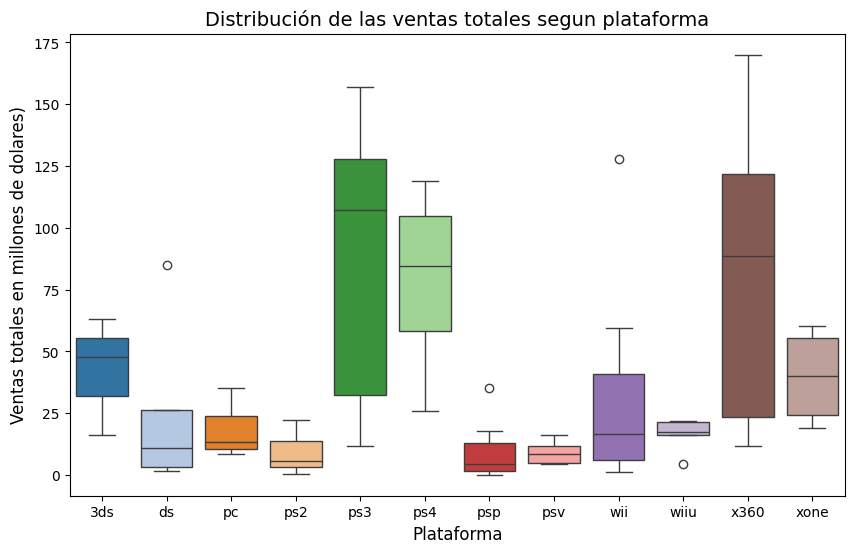

In [19]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=games_top_platforms, x='platform', y='total_sales',hue='platform', palette='tab20')
plt.xlabel("Plataforma", fontsize=12)
plt.ylabel("Ventas totales en millones de dolares)", fontsize=12)
plt.title("Distribución de las ventas totales segun plataforma", fontsize=14)

plt.show()


En los anteriores diagramas de caja muestra de las plataformas top,se expuso la distribución de las ventas totales por plataforma en millones de dólares. A partir del gráfico, se pueden destacar las siguientes observaciones:

Plataformas con mayores ventas y dispersión:
PS3, X360 y PS4 tienen las mayores ventas totales y una amplia dispersión en los datos, lo cual era un comportamiento esperado por la canntiad de titulos y ventas asociadas a los mismos.
La PS3 y la X360 muestran medianas altas, indicando que la mayoría de sus ventas se encuentran en niveles elevados.
La PS4 también muestra un rendimiento sólido, aunque con una menor dispersión en comparación con PS3 y X360.

Plataformas con ventas más estables y bajas:
PC, PSP y PSV presentan distribuciones más compactas con ventas totales más bajas y menos variabilidad, reiterando asi el comportanmiento descrito en anteriores citaciones, evidenciando refenta a la PC con dispercion menor pero estable en el tiempo.
Wii U tiene un rango de ventas reducido en comparación con su predecesora Wii, lo que sugiere un menor impacto en el mercado.

Outliers (valores atípicos):
Se observan valores atípicos en plataformas como DS, PSP, Wii y X360, lo que indica que algunos juegos tuvieron ventas excepcionalmente altas en comparación con el resto de los títulos en la misma plataforma, cabe anotar que para PS3 se puede apreciar un comportamiento similar, donde hubo algunos titulos con ventas considerablemente pero sin sen tar excesivamente alta.

Diferencias en la dispersión:
La PS2, a pesar de ser una de las plataformas más emblemáticas, muestra una menor dispersión en ventas en comparación con PS3 y X360.
Wii tiene una distribución amplia, lo que sugiere que algunos títulos tuvieron mucho éxito, mientras que otros vendieron significativamente menos.

Tendencias generales:
Las consolas de generaciones más recientes (PS4, XOne) tienen una mediana alta, lo que indica un desempeño consistente en ventas, centrando asi el foco de atencion como prometedoras plafatormas con crecimiento en sus ventas para lo largo del 2017.
Las plataformas más antiguas (PS2, DS, PSP) muestran menor dispersión y ventas más bajas, indicando su declive en el mercado, asociado a el lanzamiento de su nueva generacion.
La PC mantiene ventas relativamente bajas pero estables, lo que confirma su patrón predecible en el tiempo.
### Conclusión:
Este diagrama sugiere que Sony y Microsoft lideraron en ventas con PS3, X360 y PS4, mientras que Nintendo tuvo un desempeño más variable con Wii y 3DS. Además, se observa que las consolas más recientes tienen un crecimiento más controlado, mientras que las más antiguas han entrado en declive, esto resalta la teoria anteriormente citada en referencia a los años utiles presentes en las plataformas modernas, pero asi mismo se puede emepezar a observar como esto influye para los cambios venideros .

# Reseñas De Usuarios Vs Profesionales 

## ¿Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular?